In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [3]:
import time

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data=(X_test, y_test))

print(f'Fit Time :{time.time() - start_time}')


Epoch 1/5
1875/1875 [==============================] - 129s 68ms/step - loss: 0.1163 - accuracy: 0.9640 - val_loss: 0.0397 - val_accuracy: 0.9859
Epoch 2/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0262 - val_accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0292 - val_accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0347 - val_accuracy: 0.9893
Fit Time :642.3643243312836


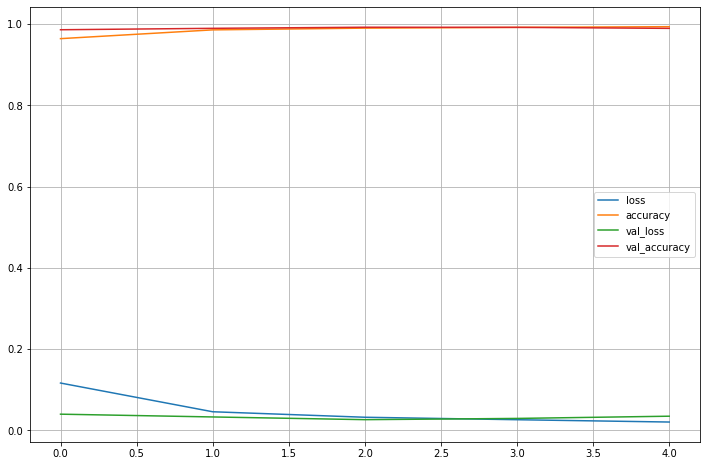

In [4]:
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [5]:
score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')


313/313 [==============================] - 7s 21ms/step - loss: 0.0347 - accuracy: 0.9893
Test Loss : 0.03471061959862709
Test Accuracy  : 0.989300012588501


In [6]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 7s 21ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)


107

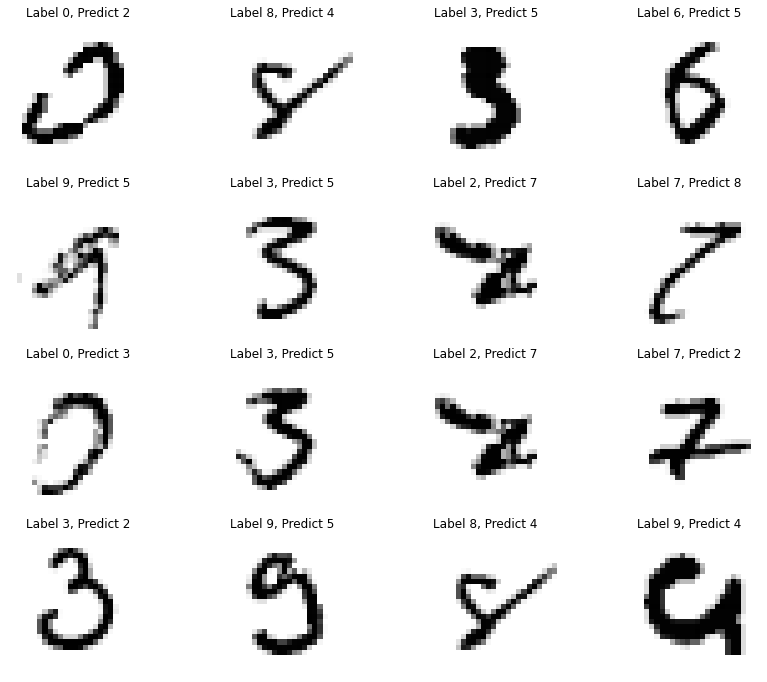

In [8]:
import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [9]:
model.save('MNIST_CNN_model.h5')
